# 01 - Introdução a SuperComputação

Como vimos na expositiva, uma solução de alto desempenho depende de três partes:

1. algoritmos eficientes
2. implementações eficientes
3. paralelismo

Na atividade de hoje vamos estudar o primeiro ponto e quantificar o efeito de algoritmos eficientes na resolução de um problema complexo. 

## Problemas estudados em SuperComputação

Em Desafios de Programação conhecemos a classe dos problemas NP-completo, que são aqueles que acreditamos não existir nenhum algoritmo determinístico que os resolvem em tempo polinomial. Ou seja, são problemas importantes cuja solução é difícil. Em geral temos classes de algoritmos para resolvê-los:

1. ótimos globais: algoritmo que encontra a solução "correta" do problema. 
2. ótimos locais: algoritmo que encontra uma solução "boa" e que não pode ser melhorada por pequenas modificações. 
3. aproximação: algoritmos que garantem estar "perto o suficiente" da solução ótima. Este tipo de algoritmo não nos interessa em SuperComputação.

Iremos analisar hoje 4 executáveis que resolvem o problema do [Caixeiro Viajante](https://en.wikipedia.org/wiki/Travelling_salesman_problem). 

1. `busca-local-1` - implementação de um método de busca rápida, porém não ótima.
1. `busca-local-1-par` - implementação paralela do programa acima.
2. `busca-local-2` - implementação alternativa do mesmo método acima. Os resultados de ambos são idênticos.
2. `busca-local-2-par` - implementação paralela do programa acima.

!!! important 
    Não estamos interessados no Caixeiro Viajante em si hoje. Queremos é comparar diferentes maneiras de resolvê-lo para entendermos o papel de técnicas de SuperComputação na velocidade de processamento e nos resultados obtidos. 


## Ferramental

Realizar testes de maneira automatizada é muito importante para quantificar os efeitos de diferentes algoritmos e técnicas de paralelismo. O snippet abaixo executa 

In [4]:
import subprocess
import time

with open('entradas-busca-local/in-0.txt') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./busca-local-1'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.00491397175937891


Vamos agora praticar usar este snippet para executar nossos testes automaticamente. 

!!! example

    Crie uma função `roda_com_entrada(executavel, arquivo_in)` que roda o primeiro argumento usando como entrada o conteúdo do segundo argumento. Teste seu código com o executável `busca-local-1` e com o arquivo de entrada `in-0.txt` usado no exemplo acima.

    Sua função deverá devolver uma tupla `(stdout,time)` com `stdout` sendo a saída do programa e `time` seu tempo de execução em segundos. 

In [5]:
# TODO: exercício aqui
def roda_com_entrada(executavel, arquivo_in):
    with open(f'entradas-busca-local/{arquivo_in}') as f:
        start = time.perf_counter()
        proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

    return (proc.stdout or proc.stderr, end-start)

print(roda_com_entrada('./busca-local-1', 'in-0.txt'))  

('232.234 0\n3 0 4 1 2 \n', 0.007642228156328201)


## Algoritmos sequenciais

Com esse código, vamos criar um relatório interativo que roda nossos testes automaticamente e já plota informações prontas para nossas análises. Vamos começar examinando o desempenho do executável `busca-local-1`.

!!! example

    Rode o `busca-local` com os arquivos de entrada na pasta `entradas-busca-local`. Guarde os tempos em uma lista.
    

In [8]:
# TODO: exercício aqui
lista_tempo = []
for i in range(10):
    res, tempo = roda_com_entrada('./busca-local-1', f'in-{i}.txt')
    lista_tempo.append(tempo)

print(lista_tempo)

[0.00656008580699563, 0.006471229717135429, 0.010138923302292824, 0.01590127171948552, 0.09845461416989565, 0.38962097465991974, 1.228880819864571, 3.0485028559342027, 6.89216706296429, 14.016566933132708]



!!! example

    Leia o tamanho das entradas dos arquivos  na pasta `entradas-busca-local` e guarde em uma segunda lista.

In [9]:
# TODO: exercício aqui
lista_tempo = []
for i in range(10):
    res, tempo = roda_com_entrada('./busca-local-1', f'in-{i}.txt')
    lista_tempo.append(tempo)

print(lista_tempo)

[0.0071458034217357635, 0.007089716847985983, 0.009448036085814238, 0.019905148074030876, 0.10460888687521219, 0.3857284467667341, 1.2398616960272193, 3.060560225043446, 6.99691513273865, 13.90403538197279]



!!! example 

    Plote o tempo de execução pelo tamanho da entrada usando `matplotlib`

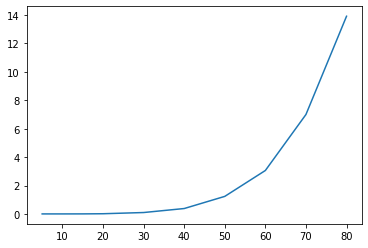

In [11]:

import matplotlib.pyplot as plt

plt.plot(lista_tamanhos, lista_tempo)
plt.show()

[0.0077467369846999645, 0.007881535217165947, 0.01062367670238018, 0.020335956010967493, 0.09824396716430783, 0.42021782509982586, 1.237514226231724, 3.0393896349705756, 6.954218784812838, 13.822472574189305]


!!! example
    Repita os três passos acima para o executável `busca-local-2`. Finalize plotando os tempos de execução de ambos os executáveis no mesmo gráfico.

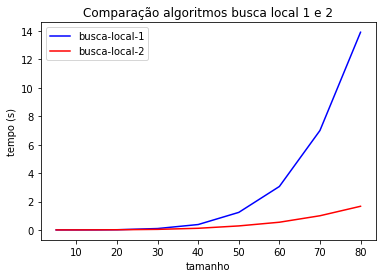

In [16]:
#TODO: seu código aqui
lista_tempo2 = []
for i in range(10):
    res, tempo = roda_com_entrada('./busca-local-2', f'in-{i}.txt')
    lista_tempo2.append(tempo)

plt.plot(lista_tamanhos, lista_tempo, "b-", label='busca-local-1')
plt.plot(lista_tamanhos, lista_tempo2,"r-", label='busca-local-2')
plt.title('Comparação algoritmos busca local 1 e 2')
plt.legend()
plt.ylabel("tempo (s)")
plt.xlabel("tamanho")
plt.show()

!!! example
    Segundo uma coleta de dados informal e altamente confiável, 93,17% dos alunos não colocam legendas nem títulos nos gráficos gerados. Faça isso agora. 

!!! question medium

    Interprete o gráfico que você gerou na linha de cima. 

    ### O tempo para execução dadas mesmas entradas, foi muito menor no algoritmo 2, o que implica numa menor complexidade

!!! question medium
    Compare manualmente a saída dos programas. Existe diferença em seus resultados?



In [17]:
for i in range(10): 
    print("Algoritmo 1:", roda_com_entrada('./busca-local-1', f'in-{i}.txt'))
    print("Algoritmo 2:", roda_com_entrada('./busca-local-2', f'in-{i}.txt'))

Algoritmo 1: ('232.234 0\n3 0 4 1 2 \n', 0.009129739832133055)
Algoritmo 2: ('232.234 0\n2 1 4 0 3 \n', 0.005054275970906019)
Algoritmo 1: ('220.898 0\n0 5 3 8 4 7 6 1 2 9 \n', 0.008864906150847673)
Algoritmo 2: ('220.898 0\n4 7 6 1 2 9 0 5 3 8 \n', 0.009749065153300762)
Algoritmo 1: ('357.641 0\n0 12 1 9 5 14 8 11 13 4 7 6 3 2 10 \n', 0.008791483938694)
Algoritmo 2: ('357.641 0\n13 11 8 14 5 9 1 12 0 10 2 3 6 7 4 \n', 0.008093719836324453)
Algoritmo 1: ('384.076 0\n9 11 4 10 15 16 19 12 14 17 7 1 6 18 8 13 3 5 0 2 \n', 0.02136550284922123)
Algoritmo 2: ('384.076 0\n11 4 10 15 16 19 12 14 17 7 1 6 18 8 13 3 5 0 2 9 \n', 0.015700223855674267)
Algoritmo 1: ('499.842 0\n16 26 18 8 3 11 28 14 23 7 22 20 10 6 17 15 2 4 29 25 9 0 5 12 21 27 13 1 24 19 \n', 0.09342135023325682)
Algoritmo 2: ('499.842 0\n16 26 18 8 3 11 28 14 23 7 22 20 10 6 17 15 2 4 29 25 9 0 5 12 21 27 13 1 24 19 \n', 0.04739394597709179)
Algoritmo 1: ('615.722 0\n22 23 16 21 39 2 6 9 38 17 35 24 11 1 29 20 26 36 31 7 0 30 

!!! question medium 
    Resgate seus conhecimentos de Desafios de Programação e explique a diferença entre os algoritmos.


## Algoritmos paralelos

Na discussão inicial da expositiva chegamos à conclusão de que se conseguimos realizar *N* operações em paralelo teremos um ganho de no máximo *N* vezes no desempenho de nosso programa. Nesta parte iremos estudar esta afirmação usando implementações paralelas dos algoritmos da seção anterior. 

!!! example
    Execute os algoritmos paralelos com as mesmas entradas e compare com suas versões paralelas. Use um gráfico para facilitar as comparações

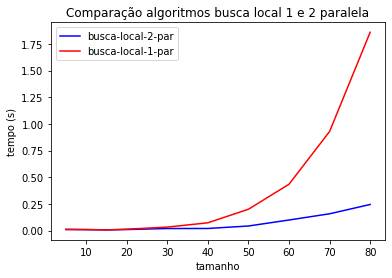

In [18]:
lista_tempo1_par = []
lista_tempo2_par = []

for i in range(10):
    res, tempo = roda_com_entrada('./busca-local-1-par', f'in-{i}.txt')
    lista_tempo1_par.append(tempo)

for i in range(10):
    res, tempo = roda_com_entrada('./busca-local-2-par', f'in-{i}.txt')
    lista_tempo2_par.append(tempo)

plt.plot(lista_tamanhos, lista_tempo2_par,'b-', label='busca-local-2-par')
plt.plot(lista_tamanhos, lista_tempo1_par,'r-', label='busca-local-1-par')
plt.title('Comparação algoritmos busca local 1 e 2 paralela')
plt.legend()
plt.ylabel("tempo (s)")
plt.xlabel("tamanho")
plt.show()

In [20]:
print("Tempo medio algoritmo 1:", sum(lista_tempo)/len(lista_tempo))
print("Tempo medio algoritmo 1 paralelizado:", sum(lista_tempo1_par)/len(lista_tempo))

print("Tempo medio algoritmo 2:", sum(lista_tempo2)/len(lista_tempo))
print("Tempo medio algoritmo 2 paralelizado:", sum(lista_tempo2_par)/len(lista_tempo))

Tempo medio algoritmo 1: 2.5735298473853616
Tempo medio algoritmo 1 paralelizado: 0.3564535700250417
Tempo medio algoritmo 2: 0.3721046556252986
Tempo medio algoritmo 2 paralelizado: 0.061694697057828304


!!! question medium
    Compare os tempos obtidos. Qual foi o ganho médio? Quantos *núcleos* a máquina que você está usando possui? Responda comparando cada algoritmo sequencial com sua versão paralela.

Já estabelecemos que `busca-local-2` é melhor que `busca-local-1` por ser utilizar um algoritmo mais eficiente e vimos na prática a diferença entre um algoritmo $O(n^3)$ e um algoritmo $O(n^2)$. Vamos agora examinar a seguinte questão.

!!! cite "É possível usar paralelismo para tornar `busca-local-1-par` melhor que `busca-local-2`?"

!!! example
    Compare o desempenho de `busca-local-1-par` com `busca-local-2`. Faça um gráfico

!!! question medium
    Com base em seu gráfico acima, responda a pergunta: "É possível usar paralelismo para tornar busca-local-1-par melhor que busca-local-2?"

Vamos agora generalizar a pergunta:

!!! question medium
    Dados dois algoritmos com complexidades computacionais diferentes, sendo que o primeiro é inferior ao segundo. É possível usar paralelismo para tornar o primeiro mais rápido que o segundo para todos tamanhos de entrada? Assuma que você possui um número fixo de *núcleos*. 
